#FashionMNIST Project 

For this Project, I build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [ ]:
import numpy as np
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  2.9.2


In [ ]:
# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes with softmax activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy()` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [ ]:
#Scale the values to [0, 1] by dividing every value by 255.0
train_images,test_images = train_images / 255.0, test_images / 255.0
print(train_images.shape, test_images.shape, train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


Shape of the image: (28, 28)


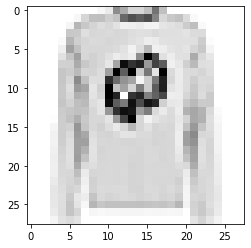

In [ ]:
#Use plt.imshow() to display the first image from the training set
import matplotlib.pyplot as plt
idx = 123
img = train_images[idx, :, :] 
print("Shape of the image:", img.shape)
plt.imshow(img, cmap="Greys")

In [ ]:
#Build a neural network with three layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")                                   
])

In [ ]:
#Compile the model, using adam as optimizer and tf.keras.losses.SparseCategoricalCrossentropy() as loss function. Use accuracy as performance metrics
index = 1234
probs = model(train_images[index:index+2])
print(probs)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
loss_fn(train_labels[index:(index+2)], probs).numpy()


tf.Tensor(
[[0.081042   0.08919006 0.05067546 0.09186867 0.05130498 0.10505264
  0.06043827 0.1397318  0.273299   0.05739709]
 [0.09188509 0.0955999  0.09778373 0.10343271 0.08417921 0.09538031
  0.08232063 0.12632906 0.13052237 0.09256693]], shape=(2, 10), dtype=float32)


1.8235359

In [ ]:
#Train the model using train_images and train_labels for 10 epochs
model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['accuracy'])
history = model.fit(train_images,train_labels , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7350 - accuracy: 0.7587
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4923 - accuracy: 0.8291
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4451 - accuracy: 0.8447
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4195 - accuracy: 0.8532
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3987 - accuracy: 0.8602
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3834 - accuracy: 0.8650
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3700 - accuracy: 0.8698
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3596 - accuracy: 0.8727
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3498 - accuracy: 0.8755
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.340

In [ ]:
#Evaluate the accuracy on the test set.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3843 - accuracy: 0.8613


[0.38434669375419617, 0.861299991607666]

In [ ]:
#Compute the confusion matrix over test set. Type of prediction mistake occurs most frequently
pred = model.predict(test_images)
print(pred[0:2, :])
mis = np.argmax(pred, axis=1) 
                                        
print(mis)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_labels, mis)
print(mat)

313/313 [==============================] - 1s 2ms/step
[[1.01505626e-04 4.99009593e-06 6.99288576e-05 3.78101577e-05
  2.38496614e-05 6.23402037e-02 1.51776985e-04 6.92097023e-02
  4.54327883e-03 8.63516927e-01]
 [4.03680169e-05 1.65800245e-07 9.97554839e-01 1.11367751e-06
  9.36266850e-04 1.62986069e-10 1.46668812e-03 1.64762193e-12
  3.92295902e-07 6.78809162e-11]]
[9 2 1 ... 8 1 5]
[[846   4  20  24   1   3  90   0  12   0]
 [  4 964   2  23   3   0   3   0   1   0]
 [ 16   2 858  11  63   1  44   0   5   0]
 [ 35  16  16 873  24   0  29   0   7   0]
 [  1   1 186  45 704   0  56   0   7   0]
 [  0   0   0   1   0 941   0  43   2  13]
 [151   1 145  26  71   0 587   0  19   0]
 [  0   0   0   0   0  25   0 927   0  48]
 [  4   1   5   7   2   4  11   4 962   0]
 [  0   0   0   0   0  11   1  36   1 951]]
